## WEEK 7 : Linear regression and multiple regression

### Estimation, Predicton of Regression Model Residual Analysis

In [ ]:
import pandas as pd
import matplotlib as mpl
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving lrm.xlsx to lrm.xlsx


In [ ]:
data = pd.read_excel('lrm.xlsx')
print(data)

   Restaurant  Student_Population  Sales
0           1                   2     58
1           2                   6    105
2           3                   8     88
3           4                   8    118
4           5                  12    117
5           6                  16    137
6           7                  20    157
7           8                  20    169
8           9                  22    149
9          10                  26    202


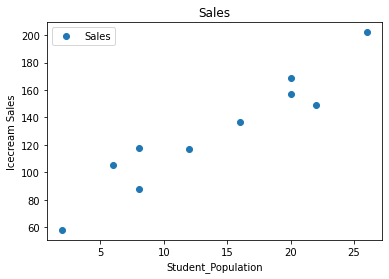

In [ ]:
data.plot('Student_Population', 'Sales', style='o')
plt.ylabel('Icecream Sales')
plt.title('Sales')
plt.show()

In [ ]:
import statsmodels.api as s
St_pop = data['Student_Population']
sales = data['Sales']
st_pop = s.add_constant(St_pop)
model1 = s.OLS(sales, st_pop)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           2.55e-05
Time:                        06:35:30   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 60.0000      9

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Method 2: to directly get the coefficents 

In [ ]:
x=data['Student_Population'].values.reshape(-1, 1)
y=data['Sales'].values.reshape(-1, 1)

In [ ]:
reg = LinearRegression()
reg.fit(x, y)

LinearRegression()

In [ ]:
reg.intercept_[0], reg.coef_[0][0]

(60.0, 5.0)

Hence the equation can be said to be $$y=60+5x$$

To find point estimate of the mean quarterly sales for all restaurants located near campus with 10000 students is given as $110000

In [ ]:
reg.predict([[10]]) #for 10000 students

array([[110.]])

Upper limit and lower limit for point estimate

Confidence interval Estimation that is the mean value of y given value of x. If individual value of y given x then called prediction interval. Margin of error is larger for the latter. But point estimate of both is same.

Confidence Intervals for the mean sales y at the given values of student population x

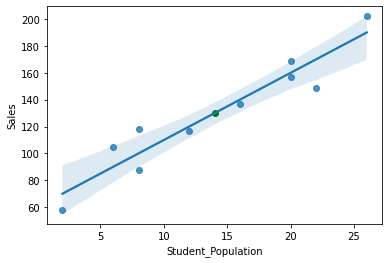

In [ ]:
x=data['Student_Population']
y=data['Sales']
plt.figure()
sns.regplot(x=x, y=y, fit_reg=True)
plt.scatter(np.mean(x), np.mean(y), color='green')

Prediction Intervals

In [ ]:
from statsmodels.stats.outliers_influence import summary_table
st, data1, ss2 = summary_table(result1, alpha=0.05)
fittedvalues = data1[:,2]
predict_mean_se = data1[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data1[:, 4:6].T
predict_ci_low, predict_ci_upp = data1[:, 6:8].T

In [ ]:
predict_mean_ci_low #confidence interval for lower limit

array([ 51.03868339,  75.2931351 ,  87.10977127,  87.10977127,
       109.56629808, 129.56629808, 147.10977127, 147.10977127,
       155.2931351 , 171.03868339])

In [ ]:
predict_mean_ci_upp #confidence interval for lower limit

array([ 88.96131661, 104.7068649 , 112.89022873, 112.89022873,
       130.43370192, 150.43370192, 172.89022873, 172.89022873,
       184.7068649 , 208.96131661])

In [ ]:
predict_ci_low #prediction interval for lower limit

array([ 32.89834155,  54.8817226 ,  65.60291394,  65.60291394,
        86.446108  , 106.446108  , 125.60291394, 125.60291394,
       134.8817226 , 152.89834155])

In [ ]:
predict_ci_upp #prediction interval for lower limit

array([107.10165845, 125.1182774 , 134.39708606, 134.39708606,
       153.553892  , 173.553892  , 194.39708606, 194.39708606,
       205.1182774 , 227.10165845])

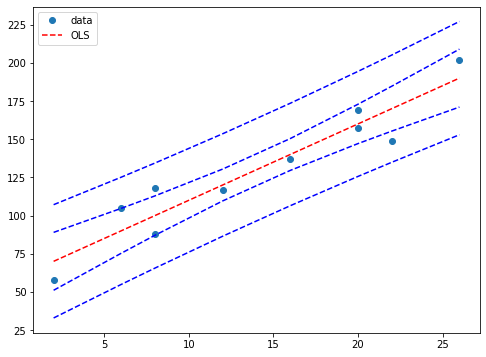

In [ ]:
X = s.add_constant(x)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="data")
ax.plot(x, fittedvalues, 'r--', label="OLS")
ax.plot(x, predict_ci_low, 'b--')
ax.plot(x, predict_ci_upp, 'b--')
ax.plot(x, predict_mean_ci_low, 'b--')
ax.plot(x, predict_mean_ci_upp, 'b--')
ax.legend(loc="best")
plt.show()

Residual plot against x

<Axes: xlabel='Student_Population', ylabel='Sales'>

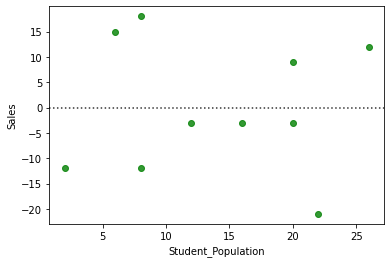

In [ ]:
sns.residplot(x=data['Student_Population'], y=data['Sales'], color='g')

Residual plot against y

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

reg1 = ols(formula="Sales ~ Student_Population", data=data)
fit1 = reg1.fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           2.55e-05
Time:                        06:35:32   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             60.0000      9

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
print(anova_lm(fit1))

                     df   sum_sq   mean_sq          F    PR(>F)
Student_Population  1.0  14200.0  14200.00  74.248366  0.000025
Residual            8.0   1530.0    191.25        NaN       NaN


Standardized residuals against the independent variable x

In [ ]:
influence = fit1.get_influence()
resid_student = influence.resid_studentized_external
resid_student

array([-1.09212653,  1.26798654, -0.94196706,  1.54023214, -0.21544891,
       -0.21544891, -0.22263461,  0.68766487, -2.01063738,  1.09212653])

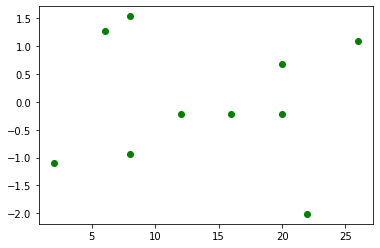

In [ ]:
plt.figure()
plt.scatter(data['Student_Population'], resid_student, color='green')
#if 95% of values lie between -2 and 2 then it is a standardized residual plot

Normal Probability Plot

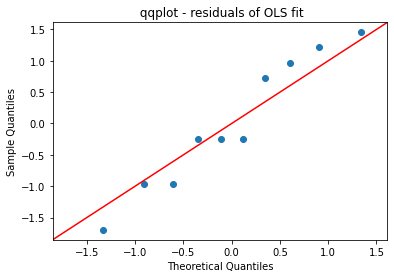

In [ ]:
import statsmodels.api as sm
res = fit1.resid #residuals
probplot = sm.ProbPlot(res, stats.norm, fit=True)
fig = probplot.qqplot(line='45')
h = plt.title(' qqplot - residuals of OLS fit')
plt.show()
#if values cluster around 45 deg line then it is a normal probability plot

### Multiple Regression

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving TRUCKING.xlsx to TRUCKING.xlsx


In [ ]:
df1 = pd.read_excel('TRUCKING.xlsx')
print(df1)

   Driving Assignmnet   x1  n_of_deliveries  travel_time
0                   1  100                4          9.3
1                   2   50                3          4.8
2                   3  100                4          8.9
3                   4  100                2          6.5
4                   5   50                2          4.2
5                   6   80                2          6.2
6                   7   75                3          7.4
7                   8   65                4          6.0
8                   9   90                3          7.6
9                  10   90                2          6.1


Scatter diagram of preliminary data for trucking x1

Text(0.5, 1.0, 'Simple linear regression with miles travelled')

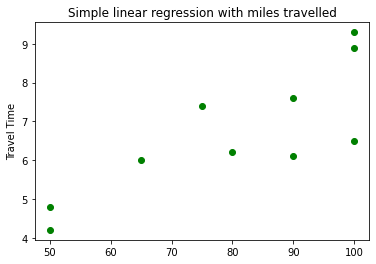

In [ ]:
plt.scatter(df1['x1'], df1['travel_time'], color='green')
plt.ylabel('Travel Time')
plt.title('Simple linear regression with miles travelled')

Scatter diagram of preliminary data for trucking x2

Text(0.5, 1.0, 'Linear regression with number of deliveries')

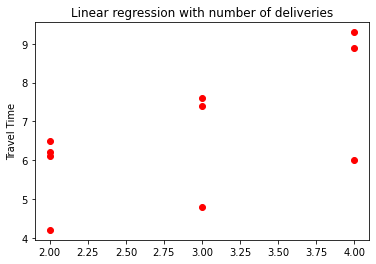

In [ ]:
plt.scatter(df1['n_of_deliveries'], df1['travel_time'], color='red')
plt.ylabel('Travel Time')
plt.title('Linear regression with number of deliveries')

Scatter diagram for x1 and x2

Text(0.5, 1.0, 'Multiple regression')

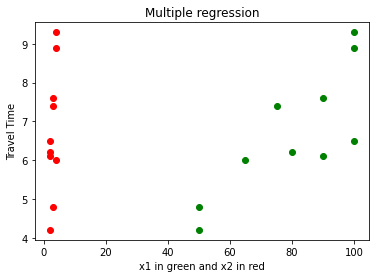

In [ ]:
plt.figure()
plt.scatter(df1['x1'], df1['travel_time'], color='green')
plt.scatter(df1['n_of_deliveries'], df1['travel_time'], color='red')
plt.ylabel('Travel Time')
plt.xlabel('x1 in green and x2 in red')
plt.title('Multiple regression')

In [ ]:
reg1 = ols(formula = 'travel_time ~ x1', data=df1)
fit1 = reg1.fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:            travel_time   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     15.81
Date:                Sun, 26 Mar 2023   Prob (F-statistic):            0.00408
Time:                        06:35:51   Log-Likelihood:                -13.092
No. Observations:                  10   AIC:                             30.18
Df Residuals:                       8   BIC:                             30.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2739      1.401      0.909      0.3

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
from statsmodels.formula.api import ols
model = ols('travel_time ~ x1 + n_of_deliveries', data=df1).fit()
model.summary()

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            travel_time   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.88
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           0.000276
Time:                        06:35:51   Log-Likelihood:                -6.8398
No. Observations:                  10   AIC:                             19.68
Df Residuals:                       7   BIC:                             20.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.8687      0.952     -0.913      0.392      -3.119       1.381
x1                  0.0611      0.010      6.182      0.000       0.038       0.085
n_of_deliveries     0.9234      0.221      4.176      0.004       0.401       1.446
==============================================================================
Omnibus:                        0.039   Durbin-Watson:                   2.515
Prob(Omnibus):                  0.981   Jarque-Bera (JB):                0.151
Skew:                           0.074   Prob(JB):                        0.927
Kurtosis:                       2.418   Cond. No.                         435.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(anova_lm(fit1))

           df     sum_sq    mean_sq          F   PR(>F)
x1        1.0  15.871304  15.871304  15.814578  0.00408
Residual  8.0   8.028696   1.003587        NaN      NaN


In [ ]:
anova_table = anova_lm(model, typ=1)
anova_table
#SSR is increased and SSE is reduced when new independent variable is introduced

,df,sum_sq,mean_sq,F,PR(>F)
x1,1.0,15.871304,15.871304,48.315660,0.000221
n_of_deliveries,1.0,5.729252,5.729252,17.441075,0.004157
Residual,7.0,2.299443,0.328492,NaN,NaN


$$SST = SSE + SSR$$
Adjusted R square is more accurate.
Initially, $$R{^2} = \frac{SSR}{SST}$$
Then after, adjusting,
$$R_{a}{^2} = 1-(1-R{^2}) \frac{n-1}{n-p-1}$$
where n is number of observations and p denotes the number of independent variables

Regression approach to ANOVA

In [ ]:
new_data = {'A':[58, 64, 55, 66, 67], 'B':[58, 69, 71, 64, 68], 'C':[48, 57, 59, 47, 49]}

In [ ]:
data2 = pd.DataFrame(new_data)
data2

,A,B,C
0,58,58,48
1,64,69,57
2,55,71,59
3,66,64,47
4,67,68,49


In [ ]:
data_r = pd.melt(data2.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C'])
data_r.columns = ['index', 'treatments', 'value']
data_r

,index,treatments,value
0,0,A,58
1,1,A,64
2,2,A,55
3,3,A,66
4,4,A,67
5,0,B,58
6,1,B,69
7,2,B,71
8,3,B,64
9,4,B,68


In [ ]:
model = ols('value ~ C(treatments)', data=data_r).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),2.0,520.0,260.000000,9.176471,0.003818
Residual,12.0,340.0,28.333333,NaN,NaN


In [ ]:
just_dummies = pd.get_dummies(data_r['treatments'])
just_dummies

,A,B,C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,0,1,0


In [ ]:
step_l = pd.concat([data_r, just_dummies], axis=1)
step_l.drop(['treatments', 'C'], inplace=True, axis=1)
step_l

,index,value,A,B
0,0,58,1,0
1,1,64,1,0
2,2,55,1,0
3,3,66,1,0
4,4,67,1,0
5,0,58,0,1
6,1,69,0,1
7,2,71,0,1
8,3,64,0,1
9,4,68,0,1


In [ ]:
import statsmodels.api as s
result = s.OLS(step_l['value'], sm.add_constant(step_l[['A', 'B']])).fit()
print(result.summary())

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     9.176
Date:                Sun, 26 Mar 2023   Prob (F-statistic):            0.00382
Time:                        06:35:51   Log-Likelihood:                -44.691
No. Observations:                  15   AIC:                             95.38
Df Residuals:                      12   BIC:                             97.51
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.0000      2.380     21.844      0.0

### Categorial variable regression

Example 1:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dummy.xlsx to dummy (1).xlsx


In [ ]:
tb1 = pd.read_excel('dummy.xlsx')
print(tb1)

   servicecall  months_since_last_service type_of_repair  repair_time_in_hours
0            1                          2     electrical                   2.9
1            2                          6     mechanical                   3.0
2            3                          8     electrical                   4.8
3            4                          3     mechanical                   1.8
4            5                          2     electrical                   2.9
5            6                          7     electrical                   4.9
6            7                          9     mechanical                   4.2
7            8                          8     mechanical                   4.8
8            9                          4     electrical                   4.4
9           10                          6     electrical                   4.5


Text(0.5, 1.0, 'Simple linear regression')

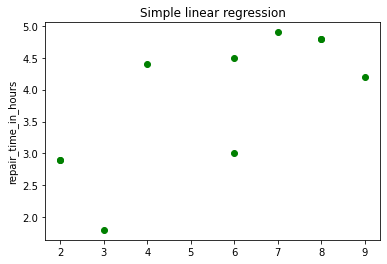

In [ ]:
plt.scatter(tb1['months_since_last_service'], tb1['repair_time_in_hours'], color='green')
plt.ylabel('repair_time_in_hours')
plt.title('Simple linear regression')

In [ ]:
Reg = ols(formula="repair_time_in_hours ~ months_since_last_service", data=tb1)
fit1 = Reg.fit()
print(fit1.summary())

                             OLS Regression Results                             
Dep. Variable:     repair_time_in_hours   R-squared:                       0.534
Model:                              OLS   Adj. R-squared:                  0.476
Method:                   Least Squares   F-statistic:                     9.174
Date:                  Sun, 26 Mar 2023   Prob (F-statistic):             0.0163
Time:                          07:15:30   Log-Likelihood:                -10.602
No. Observations:                    10   AIC:                             25.20
Df Residuals:                         8   BIC:                             25.81
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
In

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Linear equation is $$y = 2.15 + 0.304x1$$ where y is dependent variable repair time in hours and x1 is variable months till last service

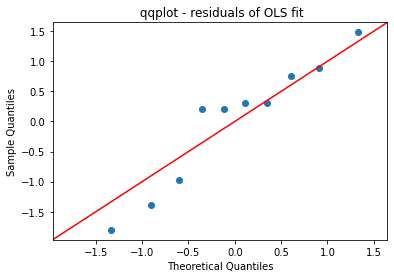

In [ ]:
res = fit1.resid
probplot = s.ProbPlot(res, stats.norm, fit=True)
fig = probplot.qqplot(line = '45')
h = plt.title(' qqplot - residuals of OLS fit')
plt.show()

In [ ]:
just_dummies = pd.get_dummies(tb1['type_of_repair'])
just_dummies

,electrical,mechanical
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,1,0
6,0,1
7,0,1
8,1,0
9,1,0


In [ ]:
just_dummies = pd.get_dummies(tb1['type_of_repair'])
step_l = pd.concat([tb1, just_dummies], axis=1)
step_l.drop(['type_of_repair', 'mechanical'], inplace=True, axis=1)
step_l

,servicecall,months_since_last_service,repair_time_in_hours,electrical
0,1,2,2.9,1
1,2,6,3.0,0
2,3,8,4.8,1
3,4,3,1.8,0
4,5,2,2.9,1
5,6,7,4.9,1
6,7,9,4.2,0
7,8,8,4.8,0
8,9,4,4.4,1
9,10,6,4.5,1


In [ ]:
result = sm.OLS(step_l['repair_time_in_hours'], s.add_constant(step_l[['months_since_last_service', 'electrical']])).fit()
print(result.summary())

                             OLS Regression Results                             
Dep. Variable:     repair_time_in_hours   R-squared:                       0.859
Model:                              OLS   Adj. R-squared:                  0.819
Method:                   Least Squares   F-statistic:                     21.36
Date:                  Sun, 26 Mar 2023   Prob (F-statistic):            0.00105
Time:                          07:26:47   Log-Likelihood:                -4.6200
No. Observations:                    10   AIC:                             15.24
Df Residuals:                         7   BIC:                             16.15
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Example 2:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dummy2.xlsx to dummy2.xlsx


In [ ]:
tb2 = pd.read_excel('dummy2.xlsx')
print(tb2)

   Employee  Salary  Gender  Experience
0         1     7.5    Male           6
1         2     8.6    Male          10
2         3     9.1    Male          12
3         4    10.3    Male          18
4         5    13.0    Male          30
5         6     6.2  Female           5
6         7     8.7  Female          13
7         8     9.4  Female          15
8         9     9.8  Female          21


Text(0.5, 1.0, 'Simple linear regression')

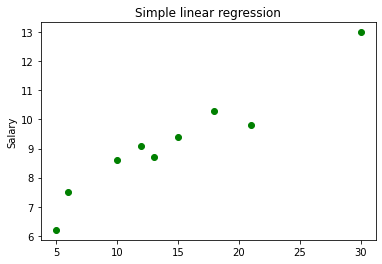

In [ ]:
plt.scatter(tb2['Experience'], tb2['Salary'], color='green')
plt.ylabel('Salary')
plt.title('Simple linear regression')

In [ ]:
Reg2 = ols(formula="Salary ~ Experience", data=tb2)
fit2 = Reg2.fit()
print(fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     87.61
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           3.30e-05
Time:                        07:32:16   Log-Likelihood:                -6.2491
No. Observations:                   9   AIC:                             16.50
Df Residuals:                       7   BIC:                             16.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8093      0.404     14.386      0.0

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Linear equation is $$y = 5.8093 + 0.2332x1$$ where y is dependent variable Salary and x1 is Experience

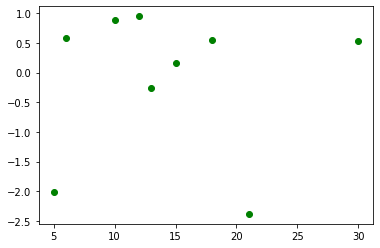

In [ ]:
influence = fit2.get_influence()
resid_student = influence.resid_studentized_external
plt.figure()
plt.scatter(tb2['Experience'], resid_student, color='green')

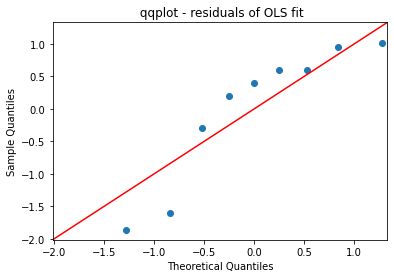

In [ ]:
res = fit2.resid #residuals
probplot = s.ProbPlot(res, stats.norm, fit=True)
fig = probplot.qqplot(line = '45')
h = plt.title(' qqplot - residuals of OLS fit')
plt.show()

In [ ]:
#add categorial data to regression analysis - variable Gender
just_dummies2 = pd.get_dummies(tb2['Gender'])
just_dummies2

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,1,0
6,1,0
7,1,0
8,1,0


In [ ]:
#remove the strings male and female and avoid the dummy variable trap
step_l = pd.concat([tb2, just_dummies2], axis=1)
step_l.drop(['Gender', 'Male'], inplace=True, axis=1)
step_l

,Employee,Salary,Experience,Female
0,1,7.5,6,0
1,2,8.6,10,0
2,3,9.1,12,0
3,4,10.3,18,0
4,5,13.0,30,0
5,6,6.2,5,1
6,7,8.7,13,1
7,8,9.4,15,1
8,9,9.8,21,1


In [ ]:
result = sm.OLS(step_l['Salary'], s.add_constant(step_l[['Female']])).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.8426
Date:                Sun, 26 Mar 2023   Prob (F-statistic):              0.389
Time:                        07:42:04   Log-Likelihood:                -17.455
No. Observations:                   9   AIC:                             38.91
Df Residuals:                       7   BIC:                             39.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7000      0.853     11.367      0.0

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Linear equation is $$y = 9.7 -1.1750x1$$ where y is dependent variable Salary and x1 is Experience but this is for females.
Value of slope of -1.175 tells that females average salary is lower than that of males by 1.175